In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

%matplotlib inline


In [2]:
!cURL https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv > AER_credit_card_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 73250  100 73250    0     0   239k      0 --:--:-- --:--:-- --:--:--  240k


In [59]:
data = pd.read_csv('AER_credit_card_data.csv', header=0)
data.head(5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [50]:
print(data.shape)
data.describe(np.linspace(0,1,11))

(1319, 12)


,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
0%,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,22.666670,1.800000,0.000426,0.000000,0.000000,6.000000,0.000000,0.000000
20%,0.000000,24.750000,2.100000,0.000667,0.000000,0.000000,12.000000,1.000000,1.000000
30%,0.000000,26.500000,2.400000,0.007853,19.787332,0.000000,14.400000,1.000000,3.000000
40%,0.000000,28.500000,2.600000,0.023962,59.156834,0.000000,24.000000,1.000000,4.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000


# Exploratory data analysis + Data Preparation

In [51]:
from IPython.display import display

In [52]:
for col in data.columns:
    print(f'-------{col}------')
    display(f'Null values - {data[col].isna().sum()}')
    display(f'Unique count - {data[col].nunique()}')

-------card------


'Null values - 0'

'Unique count - 2'

-------reports------


'Null values - 0'

'Unique count - 13'

-------age------


'Null values - 0'

'Unique count - 418'

-------income------


'Null values - 0'

'Unique count - 431'

-------share------


'Null values - 0'

'Unique count - 1162'

-------expenditure------


'Null values - 0'

'Unique count - 981'

-------owner------


'Null values - 0'

'Unique count - 2'

-------selfemp------


'Null values - 0'

'Unique count - 2'

-------dependents------


'Null values - 0'

'Unique count - 7'

-------months------


'Null values - 0'

'Unique count - 193'

-------majorcards------


'Null values - 0'

'Unique count - 2'

-------active------


'Null values - 0'

'Unique count - 35'

In [53]:
# no null values. fewer categorical columns
data[['card', 'owner', 'selfemp']].value_counts()

card  owner  selfemp
yes   no     no         508
      yes    no         452
no    no     no         186
      yes    no          82
yes   yes    yes         39
      no     yes         24
no    no     yes         20
      yes    yes          8
dtype: int64

In [62]:
data['card'] = data.card.replace({'yes':1,'no':0}).astype(np.int32)
# data['owner'] = data.owner.replace({'yes':1,'no':0}).astype(np.int32)
# data['selfemp'] = data.selfemp.replace({'yes':1,'no':0}).astype(np.int32)

# data[['card', 'owner', 'selfemp']].value_counts()

In [63]:
data[['card']].value_counts()
# highly imbalanced

card
1       1023
0        296
dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

In [64]:
df_full_train, df_test = train_test_split(data, test_size=0.2)
df_full_train

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
769,1,0,40.33333,8.200,0.028200,192.45080,yes,no,3,172,1,15
1065,1,0,27.58333,4.000,0.014950,49.25000,yes,yes,3,40,1,13
334,1,0,34.50000,6.200,0.184038,950.86410,yes,no,0,60,1,11
332,1,0,34.00000,3.700,0.189333,583.77830,yes,yes,2,5,1,2
1292,0,0,36.00000,4.500,0.000267,0.00000,yes,no,2,228,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
407,1,1,29.16667,2.200,0.038205,69.79333,no,no,0,49,1,7
154,1,0,24.91667,2.400,0.230630,461.26000,no,no,1,164,0,1
303,1,0,29.08333,4.580,0.012869,48.61500,no,no,0,50,1,7
395,1,0,27.25000,3.150,0.064940,170.46670,yes,no,2,24,1,9


In [65]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25,  random_state=1)
display(data.shape)
display(df_full_train.shape)
display(df_train.shape)
display(df_val.shape)
display(df_test.shape)

(1319, 12)

(1055, 12)

(791, 12)

(264, 12)

(264, 12)

In [66]:
df_train_x = df_train.drop(columns=['card'], axis=1).reset_index(drop=True)
df_train_y = df_train.card.reset_index(drop=True)

df_val_x = df_val.drop(columns=['card'], axis=1).reset_index(drop=True)
df_val_y = df_val.card.reset_index(drop=True)

df_test_x = df_test.drop(columns=['card'], axis=1).reset_index(drop=True)
df_test_y = df_test.card.reset_index(drop=True)

display(df_train_x.head(5))
display(df_train_y.head(5))


,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
1,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
2,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
3,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
4,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


0    0
1    0
2    1
3    1
4    1
Name: card, dtype: int32

# Question1

In [73]:
from sklearn.metrics import roc_auc_score


In [72]:
for col in ['reports', 'age', 'income', 'expenditure', 'dependents', 'months', 'active', 'share']:
    temp_x = df_train_x[col].values.reshape(-1, 1)
    temp_y = df_train_y

    temp_pred_y = temp_x
    score = roc_auc_score(temp_y, temp_pred_y)
    if score < 0.5:
        score = roc_auc_score(temp_y, -temp_pred_y)    
    display(f'{col}')
    display(f'ROC AUC score - {score}')

'reports'

'ROC AUC score - 0.7166629860689376'

'age'

'ROC AUC score - 0.5240020979407055'

'income'

'ROC AUC score - 0.5908049467233478'

'expenditure'

'ROC AUC score - 0.991042345276873'

'dependents'

'ROC AUC score - 0.5327757227773791'

'months'

'ROC AUC score - 0.5294217780967629'

'active'

'ROC AUC score - 0.6043173411362006'

'share'

'ROC AUC score - 0.989183643423692'

share  have higher AUC than the 
    dependents
    active
    reports

# Question 2

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

cols = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
dict_vectorizer = DictVectorizer(sparse=False)


In [82]:
train_x = dict_vectorizer.fit_transform(df_train_x[cols].to_dict(orient='records'))
display(train_x.shape)
display(dict_vectorizer.get_feature_names())

train_x[0:5]

(791, 13)

c:\Users\KandhasamyRajasekara\anaconda3\envs\learn-or\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['active',
 'age',
 'dependents',
 'expenditure',
 'income',
 'majorcards',
 'months',
 'owner=no',
 'owner=yes',
 'reports',
 'selfemp=no',
 'selfemp=yes',
 'share']

array([[1.700000e+01, 4.050000e+01, 1.000000e+00, 0.000000e+00,
        4.012800e+00, 1.000000e+00, 1.200000e+01, 1.000000e+00,
        0.000000e+00, 3.000000e+00, 1.000000e+00, 0.000000e+00,
        2.990431e-04],
       [4.000000e+00, 3.233333e+01, 4.000000e+00, 0.000000e+00,
        6.000000e+00, 1.000000e+00, 1.800000e+01, 0.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
        2.000000e-04],
       [7.000000e+00, 2.916667e+01, 0.000000e+00, 6.979333e+01,
        2.200000e+00, 1.000000e+00, 4.900000e+01, 1.000000e+00,
        0.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
        3.820546e-02],
       [9.000000e+00, 5.466667e+01, 2.000000e+00, 6.472067e+02,
        7.290000e+00, 1.000000e+00, 7.800000e+01, 0.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
        1.065361e-01],
       [4.000000e+00, 2.500000e+01, 2.000000e+00, 0.000000e+00,
        3.398400e+00, 0.000000e+00, 2.900000e+01, 0.000000e+00,
        1.00

In [84]:
model.fit(train_x, df_train_y)
val_x = dict_vectorizer.fit_transform(df_val_x[cols].to_dict(orient='records'))
val_pred_y = model.predict(val_x)
roc_auc_score(df_val_y, val_pred_y).round(3)

0.974

The nearest given ROC AUC score is : 0.995

# Question3


In [126]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score

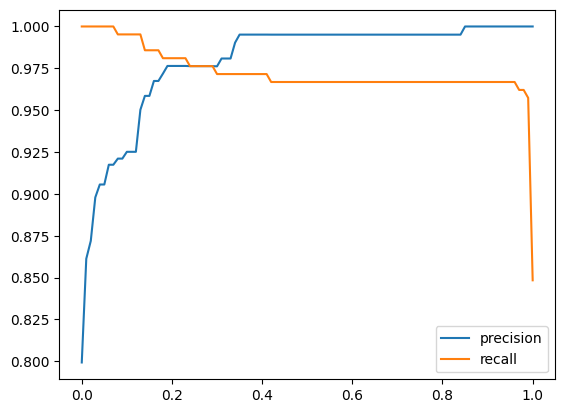

In [129]:
val_pred_y_prob = model.predict_proba(val_x)[:,1]

precisions = []
recalls = []

for thres in np.linspace(0,1,101):
    val_pred_y = val_pred_y_prob >= thres
    #temp = precision_recall_curve(df_val_y, val_pred_y_prob)
    precisions.append(precision_score(df_val_y, val_pred_y))
    recalls.append(recall_score(df_val_y, val_pred_y))

    # precision = 
# plt.plot(range(1, len(temp[0]) + 1), temp[0], label='precision')
# plt.plot(range(1, len(temp[1]) + 1), temp[1], label='recall')
# plt.plot(range(1, len(temp[2]) + 1), temp[2], label='threshold')

plt.plot(np.linspace(0,1,101), precisions, label='precision')
plt.plot(np.linspace(0,1,101), recalls, label='recall')

plt.legend()

At threshold 0.3 the precision and recall curves cross each other

# Question 4


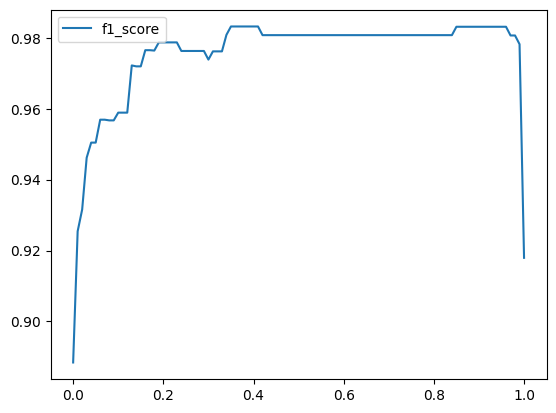

In [130]:
from sklearn.metrics import f1_score

f1_scores = []
for thres in np.linspace(0,1,101):
    val_pred_y = val_pred_y_prob >= thres
    #temp = precision_recall_curve(df_val_y, val_pred_y_prob)
    f1_scores.append(f1_score(df_val_y, val_pred_y))

plt.plot(np.linspace(0,1,101), f1_scores, label='f1_score')

plt.legend()

In [132]:
max_val = max(f1_scores)
max_index = f1_scores.index(max_val)
np.linspace(0,1,101)[max_index]


0.35000000000000003

in the answer, threshold 0.4 seem to be yielding the maximum F1 score

# Question 5

In [142]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)


In [149]:
full_train_dict = df_full_train.to_dict(orient='records')
full_train = dict_vectorizer.transform(full_train_dict)

roc_auc_scores = []

for train_indexes, val_indexes in  kfold.split(df_full_train):
    df_fold_train = df_full_train.iloc[train_indexes, :]
    
    df_fold_train_x = df_fold_train.drop(columns=['card'], axis=1).reset_index(drop=True)
    fold_train_y = df_fold_train.card.reset_index(drop=True)

    fold_train_dict_x = df_fold_train_x.to_dict(orient='records')
    fold_train_x = dict_vectorizer.transform(fold_train_dict_x)

    
    df_fold_val = df_full_train.iloc[val_indexes, :]

    df_fold_val_x = df_fold_val.drop(columns=['card'], axis=1).reset_index(drop=True)
    fold_val_y = df_fold_val.card.reset_index(drop=True)

    fold_val_dict_x = df_fold_val_x.to_dict(orient='records')
    fold_val_x = dict_vectorizer.transform(fold_val_dict_x)

    model.fit(fold_train_x, fold_train_y)
    fold_val_pred_y = model.predict_proba(fold_val_x)[:,1]

    score = roc_auc_score(fold_val_y, fold_val_pred_y)
    roc_auc_scores.append(score)

print('AUC scores - statistics')
print('Mean - ', np.mean(roc_auc_scores))
print('Std - ', np.std(roc_auc_scores))

AUC scores - statistics
Mean -  0.9964498276814243
Std -  0.0027434713804377724


0.003 is the closest choice 

# Question 6

In [152]:
for c in [0.01, 0.1, 1, 10]:
    roc_auc_scores = []

    for train_indexes, val_indexes in  kfold.split(df_full_train):
        df_fold_train = df_full_train.iloc[train_indexes, :]
        
        df_fold_train_x = df_fold_train.drop(columns=['card'], axis=1).reset_index(drop=True)
        fold_train_y = df_fold_train.card.reset_index(drop=True)

        fold_train_dict_x = df_fold_train_x.to_dict(orient='records')
        fold_train_x = dict_vectorizer.transform(fold_train_dict_x)

        
        df_fold_val = df_full_train.iloc[val_indexes, :]

        df_fold_val_x = df_fold_val.drop(columns=['card'], axis=1).reset_index(drop=True)
        fold_val_y = df_fold_val.card.reset_index(drop=True)

        fold_val_dict_x = df_fold_val_x.to_dict(orient='records')
        fold_val_x = dict_vectorizer.transform(fold_val_dict_x)

        model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
        model.fit(fold_train_x, fold_train_y)
        fold_val_pred_y = model.predict_proba(fold_val_x)[:,1]

        score = roc_auc_score(fold_val_y, fold_val_pred_y)
        roc_auc_scores.append(score)

    print(f'for C value - {c}, AUC Mean - {np.mean(roc_auc_scores).round(3)}, Std - {np.std(roc_auc_scores).round(3)} ')


for C value - 0.01, AUC Mean - 0.992, Std - 0.006 
for C value - 0.1, AUC Mean - 0.995, Std - 0.004 
for C value - 1, AUC Mean - 0.996, Std - 0.003 
for C value - 10, AUC Mean - 0.996, Std - 0.003 


for c value 1, we achieved AUC score